In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path = "/content/drive/MyDrive/w281_Final_Project_Leaf_Disease_Classification_Computer_Vision/Data/train_images"

In [3]:
import os
import pandas as pd
import json
import matplotlib.pyplot as plt
from PIL import Image


all_files = os.listdir(path)
num_images = len(all_files)
num_images

17938

In [4]:
csv_file_path = '/content/drive/MyDrive/w281_Final_Project_Leaf_Disease_Classification_Computer_Vision/Data/train.csv'
df = pd.read_csv(csv_file_path)

json_file_path = '/content/drive/MyDrive/w281_Final_Project_Leaf_Disease_Classification_Computer_Vision/Data/label_num_to_disease_map.json'
with open(json_file_path, 'r') as json_file:
    label_map = json.load(json_file)


In [5]:
df['disease_name'] = df['label'].astype(str).map(label_map)
df.head()

image_id  label                         disease_name
0  1000015157.jpg      0       Cassava Bacterial Blight (CBB)
1  1000201771.jpg      3         Cassava Mosaic Disease (CMD)
2   100042118.jpg      1  Cassava Brown Streak Disease (CBSD)
3  1000723321.jpg      1  Cassava Brown Streak Disease (CBSD)
4  1000812911.jpg      3         Cassava Mosaic Disease (CMD)

In [6]:
# Create a list of unique disease names and their corresponding labels
disease_label_df = df[['label', 'disease_name']].drop_duplicates()

# Display the list
display(disease_label_df.reset_index(inplace=False, drop=True))

label                         disease_name
0      0       Cassava Bacterial Blight (CBB)
1      3         Cassava Mosaic Disease (CMD)
2      1  Cassava Brown Streak Disease (CBSD)
3      2           Cassava Green Mottle (CGM)
4      4                              Healthy

In [7]:
df.shape

(21397, 3)

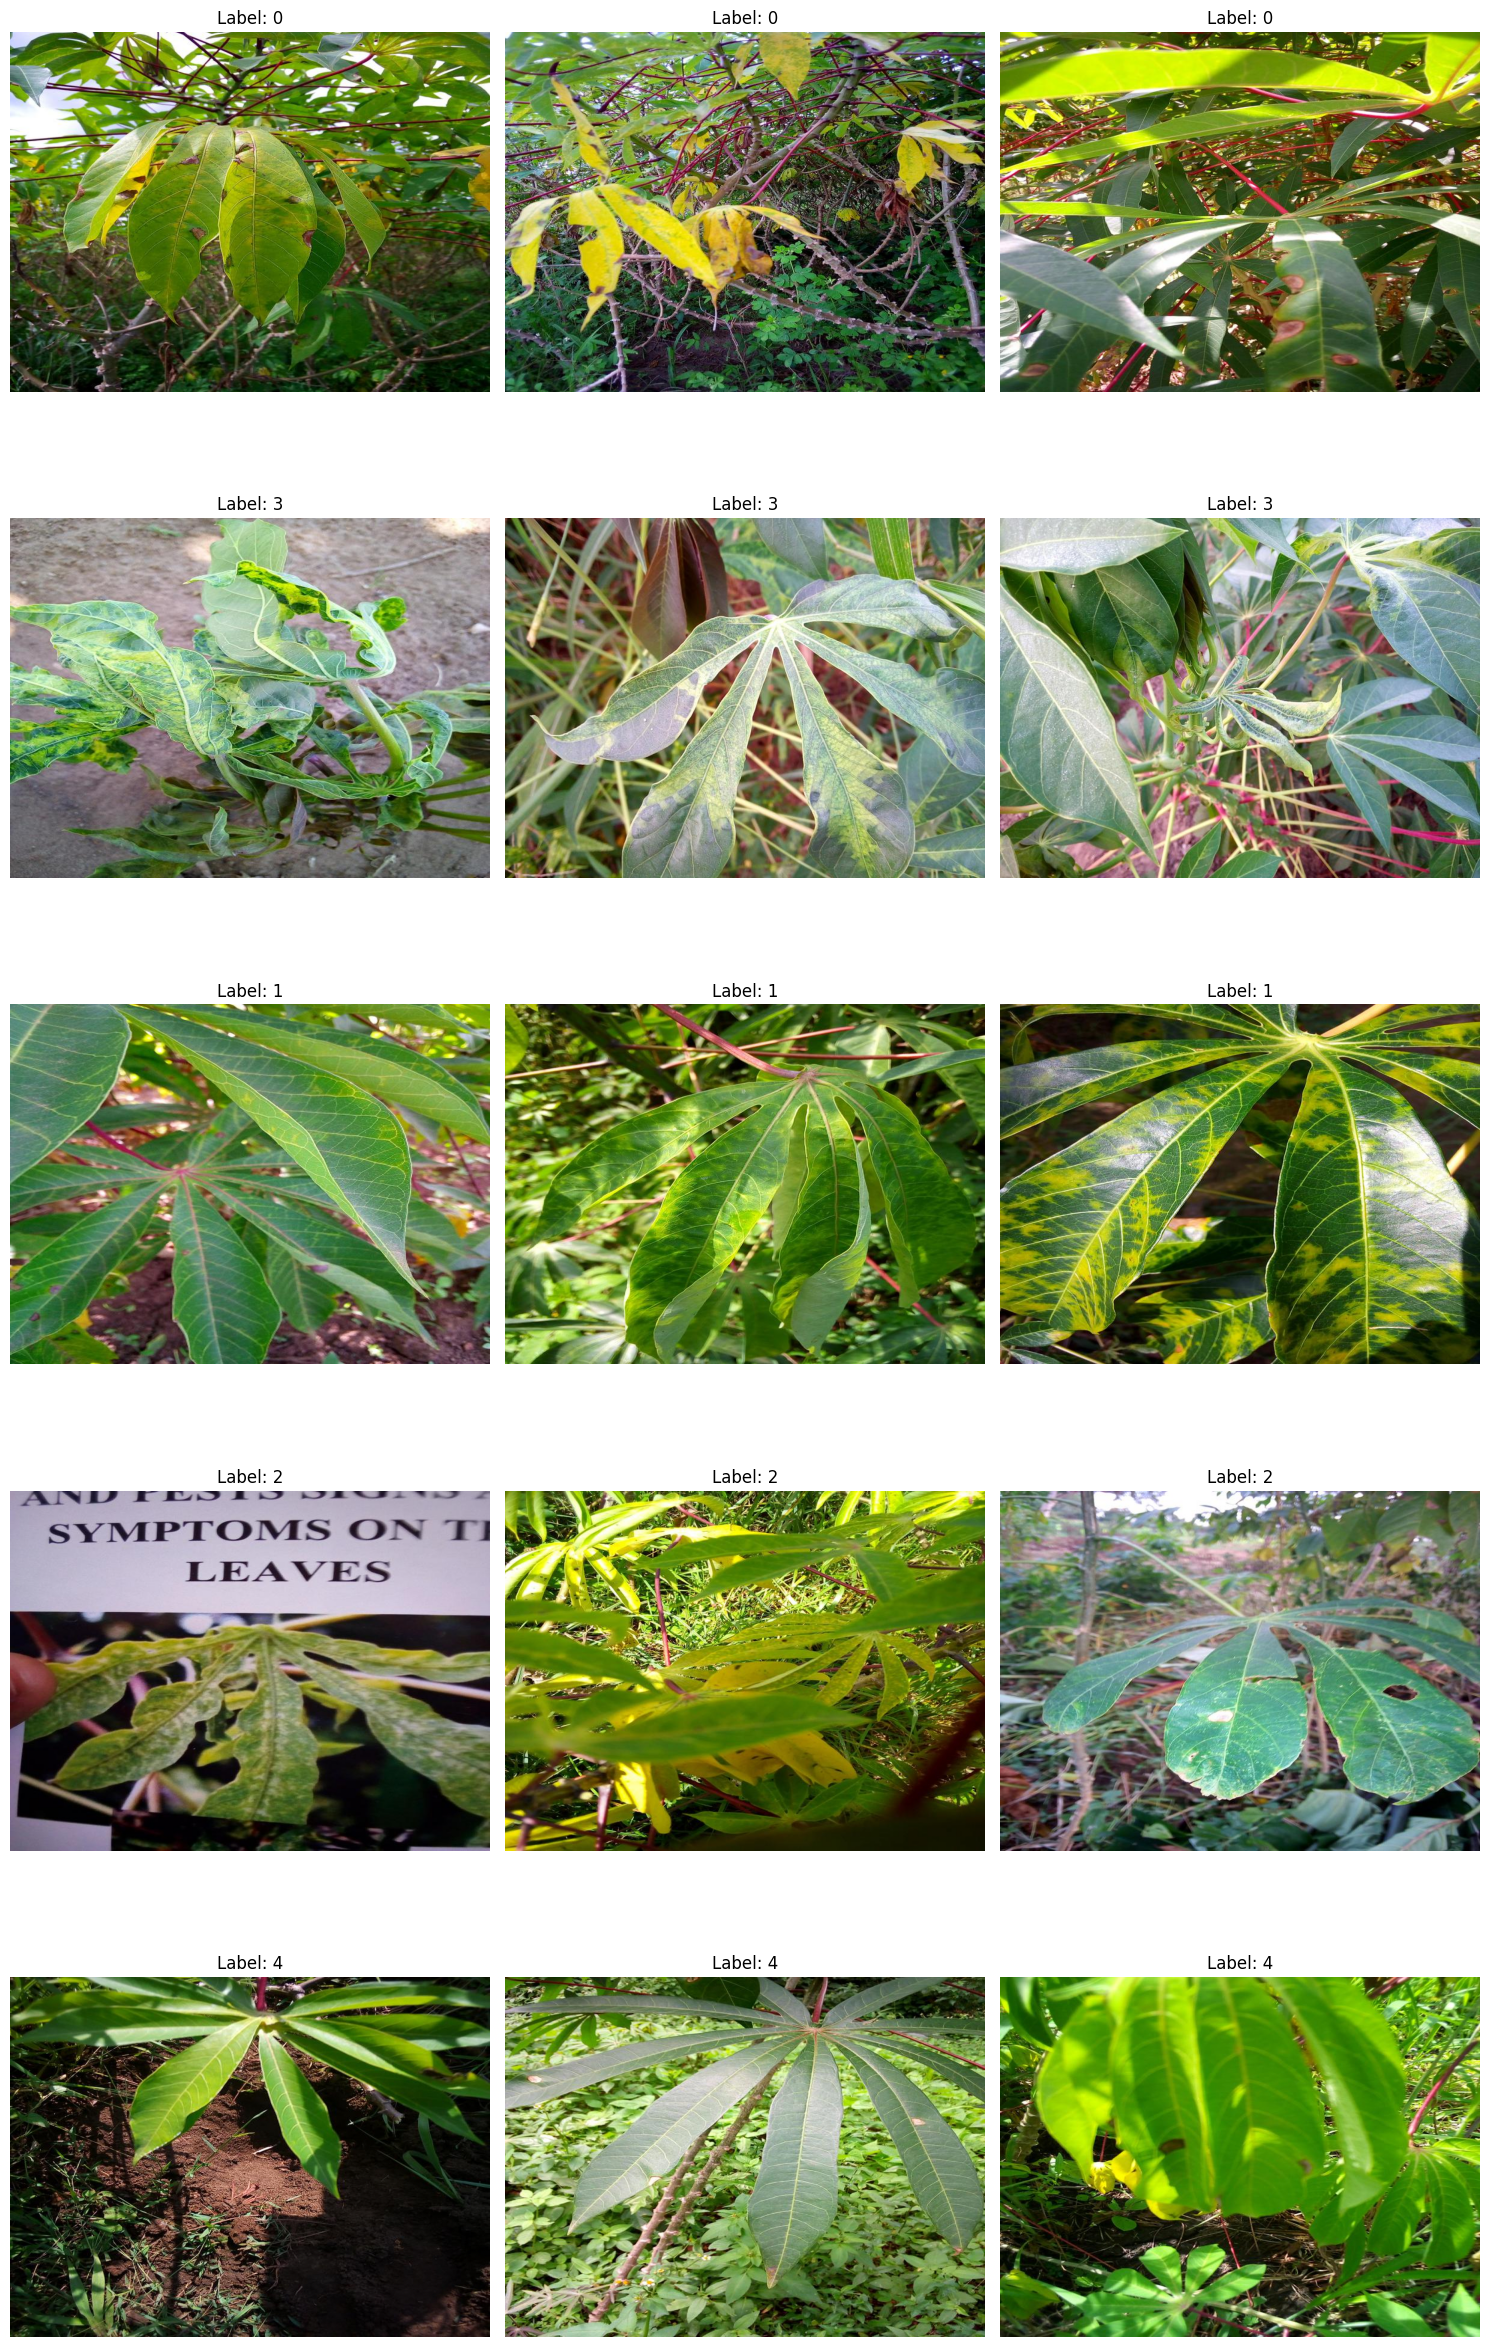

In [8]:
# Ensure that the path is concatenated properly
df["image_path"] = df["image_id"].apply(lambda x: str(path + '/' + x))  # Assuming path is the directory

# Create a figure to hold all the subplots (rows of 3 images for each label)
unique_labels = df['label'].unique()

# Create a mask for existing images and only select existing images
existing_images_mask = df["image_path"].apply(lambda x: os.path.exists(x))
existing_images_df = df[existing_images_mask]

# Set up the plot figure based on the number of labels
num_labels = len(unique_labels)
plt.figure(figsize=(15, 5 * num_labels))  # Adjust the height based on the number of labels

# Iterate over each label and plot 3 images for that label
for label_idx, label in enumerate(unique_labels):
    # Get the images for the current label
    label_images = existing_images_df[existing_images_df['label'] == label]["image_path"].sample(3, replace=True)

    # Plot 3 images in a row for the current label
    for i, image_path in enumerate(label_images):
        try:
            # Open the image
            image = Image.open(image_path)

            # Create a subplot for each image in the current row (label row)
            plt.subplot(num_labels, 3, label_idx * 3 + i + 1)
            plt.imshow(image)
            plt.title(f"Label: {label}")
            plt.axis('off')  # Hide axes for better visual appearance
        except Exception as e:
            print(f"Error opening image: {image_path} - {e}")  # Handle any errors gracefully

plt.tight_layout()
plt.show()

In [9]:
#count the number of each label
df['label'].value_counts()

label
3    13158
4     2577
2     2386
1     2189
0     1087
Name: count, dtype: int64

In [10]:
# Ensure that the path is concatenated properly
df["image_path"] = df["image_id"].apply(lambda x: str(path + '/' + x))  # Assuming path is the directory

# Initialize a counter for missing images
missing_images_count = 0

# Loop through the image paths and check if they exist
for image_path in df["image_path"]:
    if not os.path.exists(image_path):  # If file does not exist
        missing_images_count += 1

# Output the count of missing images and total number of images
total_images = len(df)
print(f"Total missing images: {missing_images_count} out of {total_images}")

Total missing images: 3459 out of 21397


In [11]:
# Ensure that the path is concatenated properly
df["image_path"] = df["image_id"].apply(lambda x: str(path + '/' + x))  # Assuming path is the directory

# Create a mask for missing images
missing_images_mask = df["image_path"].apply(lambda x: not os.path.exists(x))

# Filter the dataframe to get only the rows with missing images
missing_images_df = df[missing_images_mask]

# Group by label and count how many missing images per label
missing_images_by_label = missing_images_df.groupby("label").size()

# Output the result
print("Missing images count per label:")
print(missing_images_by_label)

Missing images count per label:
label
0     166
1     358
2     393
3    2131
4     411
dtype: int64


In [12]:
# Ensure that the path is concatenated properly
df["image_path"] = df["image_id"].apply(lambda x: str(path + '/' + x))  # Assuming path is the directory

# Create a mask for existing images
existing_images_mask = df["image_path"].apply(lambda x: os.path.exists(x))

# Filter the dataframe to get only the rows with existing images
existing_images_df = df[existing_images_mask]

# Group by label and count how many existing images per label
existing_images_by_label = existing_images_df.groupby("label").size()

# Output the result
print("Existing images count per label:")
print(existing_images_by_label)

Existing images count per label:
label
0      921
1     1831
2     1993
3    11027
4     2166
dtype: int64


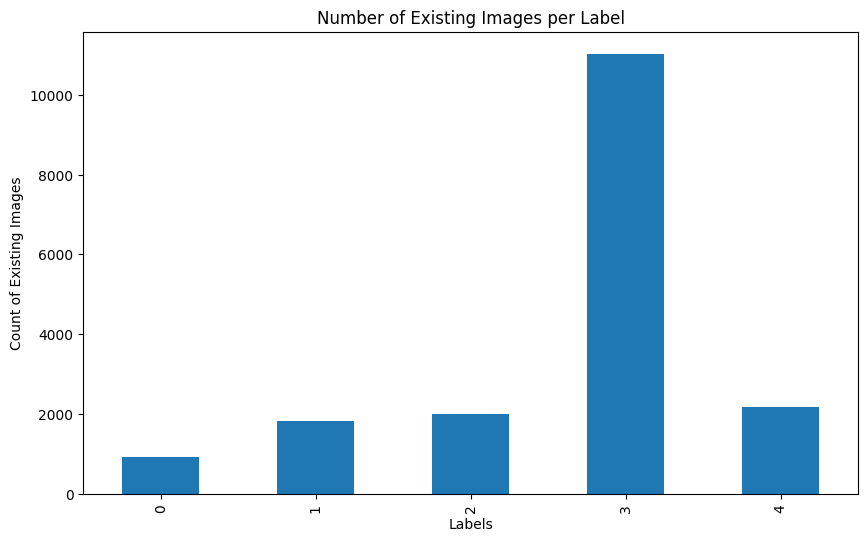

In [13]:
# Plot the histogram for existing images by label
existing_images_by_label.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.title('Number of Existing Images per Label')
plt.xlabel('Labels')
plt.ylabel('Count of Existing Images')

# Display the plot
plt.show()

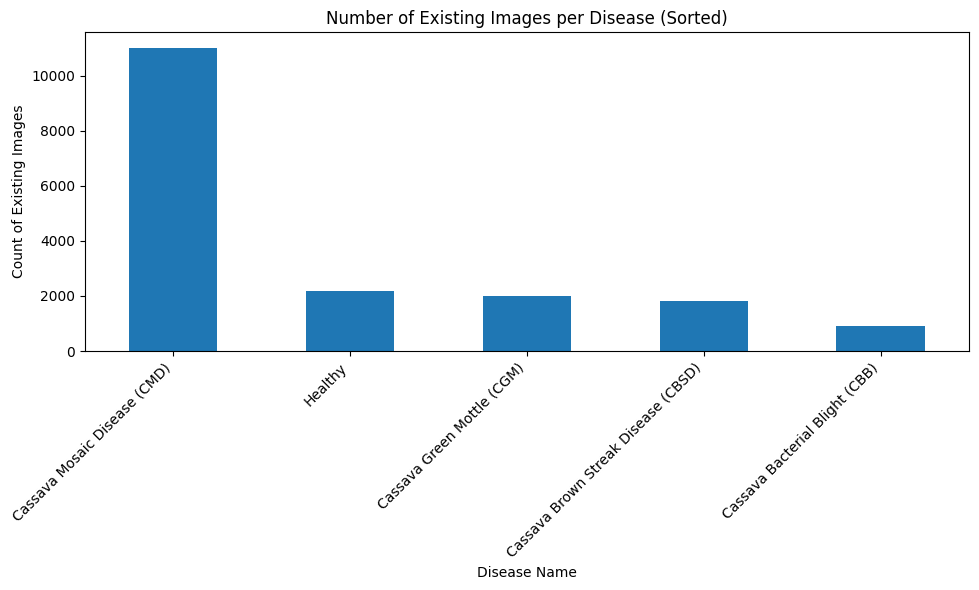

In [14]:
import matplotlib.pyplot as plt

# Assuming df contains the original dataset with 'label' and 'disease_name' columns
# Create a DataFrame with unique disease names and their corresponding labels
disease_label_df = df[['label', 'disease_name']].drop_duplicates()

# Create a mapping of label to disease name
label_to_disease = dict(zip(disease_label_df['label'], disease_label_df['disease_name']))

# Apply the mapping to the existing_images_by_label DataFrame (replace label numbers with disease names)
existing_images_by_label.index = existing_images_by_label.index.map(label_to_disease)

# Sort the DataFrame in descending order based on the count of existing images
existing_images_by_label = existing_images_by_label.sort_values(ascending=False)

# Plot the histogram for existing images by disease name, sorted by count
existing_images_by_label.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.title('Number of Existing Images per Disease (Sorted)')
plt.xlabel('Disease Name')
plt.ylabel('Count of Existing Images')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()  # Adjust layout to ensure labels are not cut off
plt.show()

In [15]:
from eda import utils
import numpy as np

In [21]:
sample_size = 100
n_eda_images = 5

In [19]:
images, labels = utils.load_images(df=existing_images_df.head(sample_size))

In [22]:
# utils.plot_class_distribution(labels)

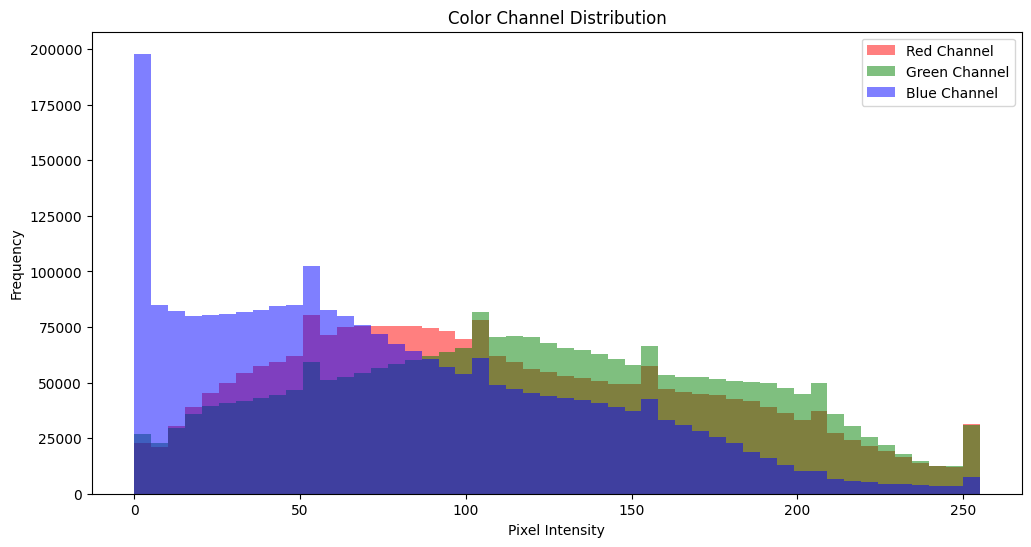

In [23]:
utils.plot_color_distribution(images, n_images=n_eda_images)

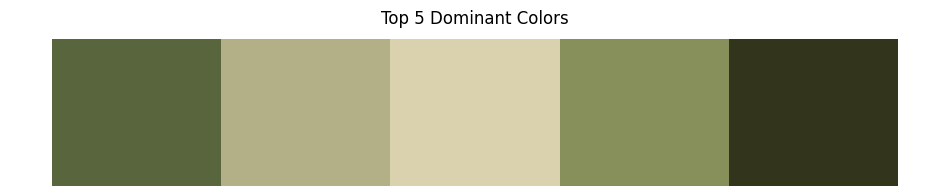

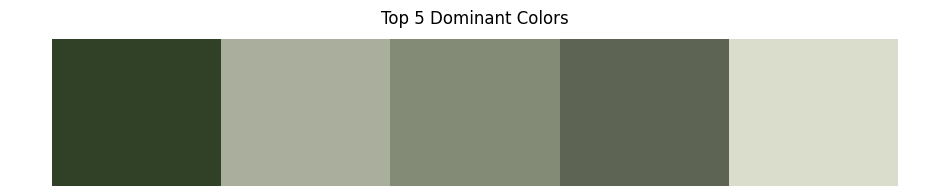

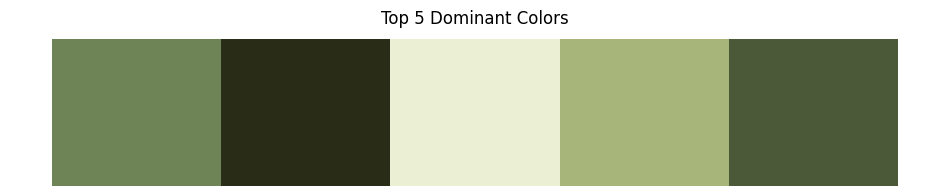

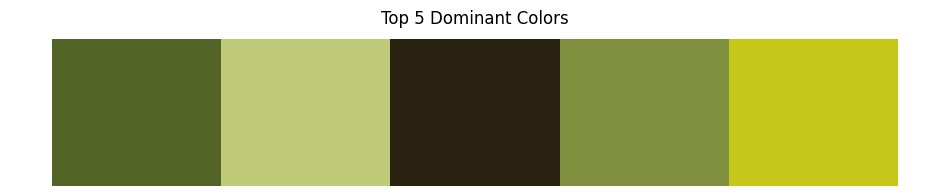

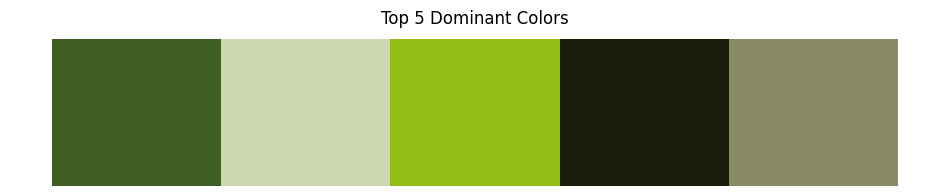

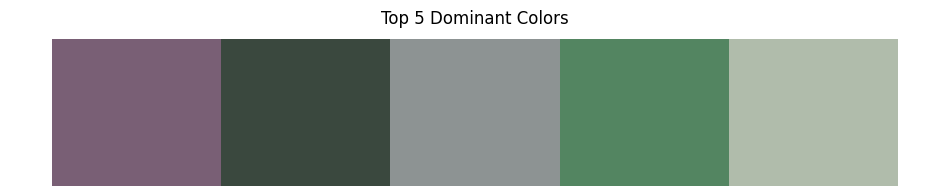

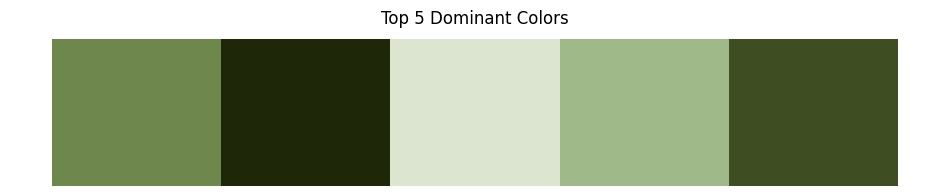

In [24]:
# For n images, plot dominant colors
for i in range(7):
  utils.plot_dominant_colors(images[i], n_colors=5)
  print('')

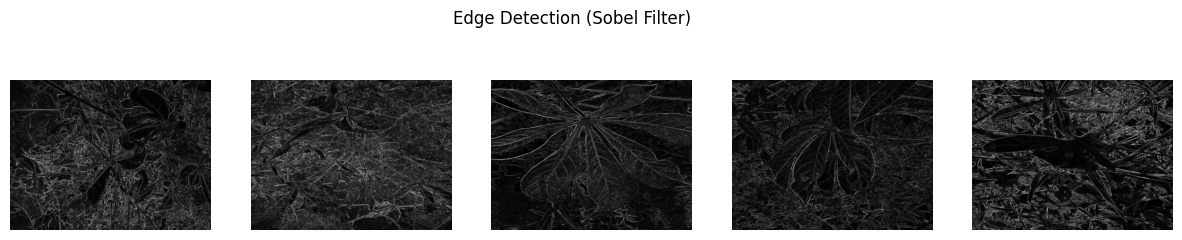

In [25]:
utils.plot_edge_detection(images, n_images=n_eda_images)

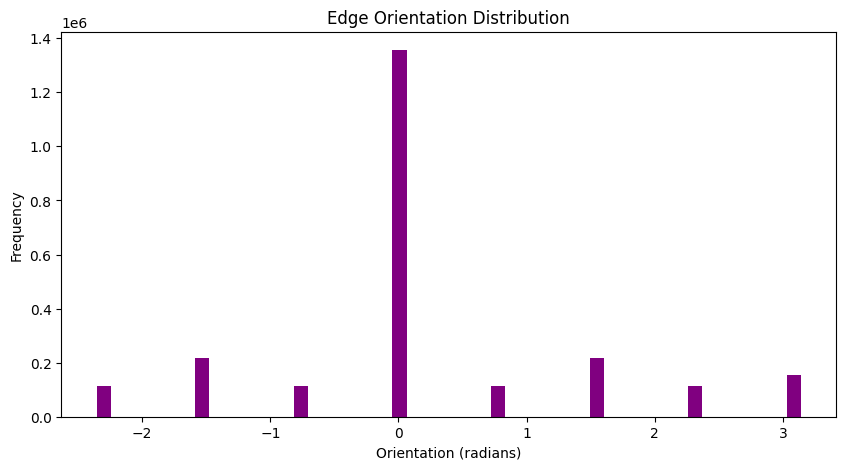

In [26]:
utils.plot_edge_orientation_distribution(images, n_images=n_eda_images)

/usr/local/lib/python3.10/dist-packages/skimage/feature/texture.py:360: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


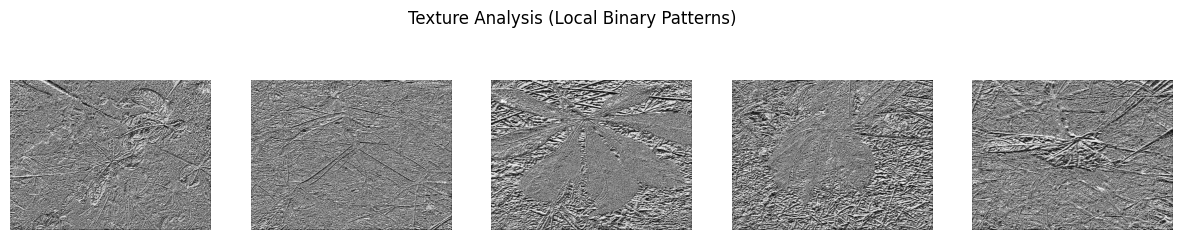

In [27]:
utils.plot_texture_analysis(images, n_images=n_eda_images)

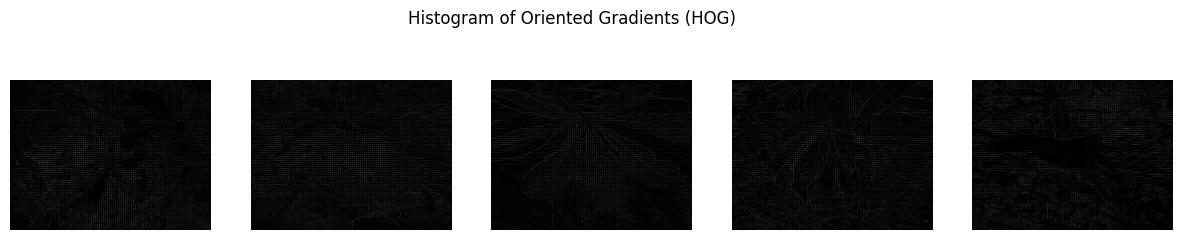

In [28]:
utils.plot_hog_analysis(images, n_images=n_eda_images)

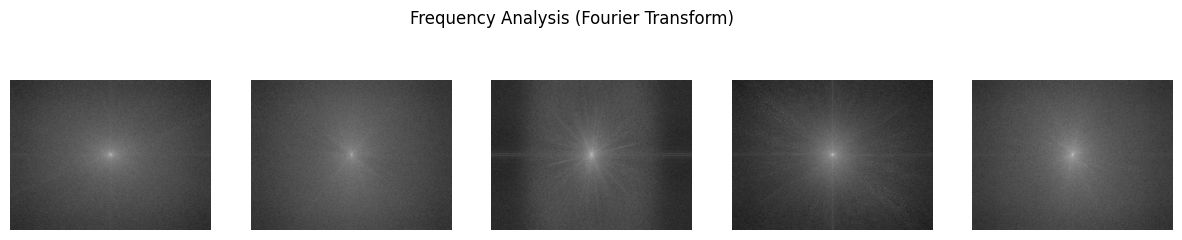

In [29]:
utils.plot_frequency_analysis(images, n_images=n_eda_images)

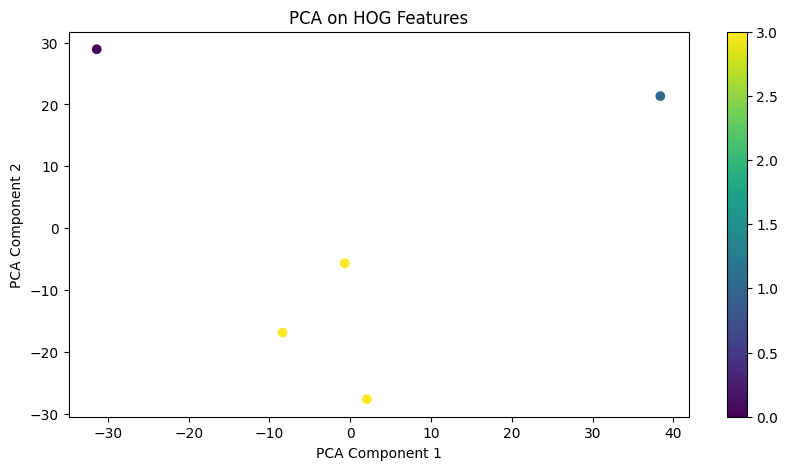

In [30]:
utils.plot_dimensionality_reduction(images, labels, n_images=n_eda_images)

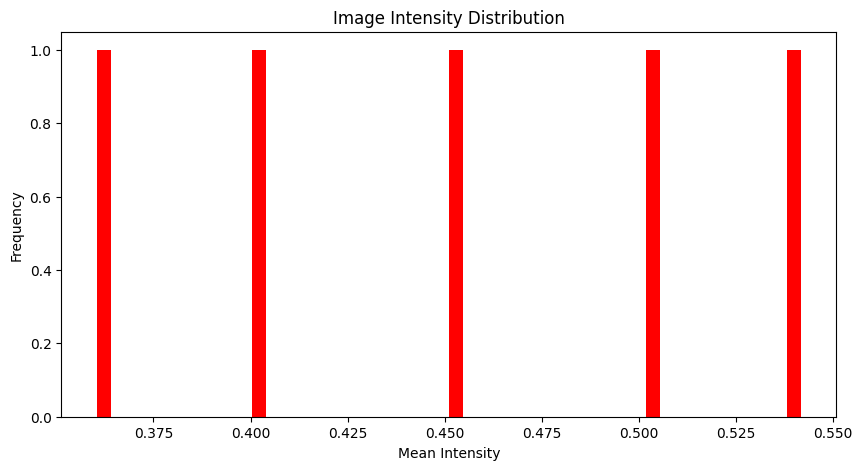

In [31]:
utils.plot_outlier_detection(images, n_images=n_eda_images)